In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

# EXERCISE 1: Data Analysis using mtcars


In [3]:
df = pd.read_csv('week_3\mtcars.csv')

In [4]:
df.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


### Find the car with the best mpg

In [5]:
df.loc[df['mpg'].idxmax()]

model    Toyota Corolla
mpg                33.9
cyl                   4
disp               71.1
hp                   65
drat               4.22
wt                1.835
qsec               19.9
vs                    1
am                    1
gear                  4
carb                  1
Name: 19, dtype: object

### Find the car with the worst mpg

In [6]:
df.loc[df['mpg'].idxmin()]

model    Cadillac Fleetwood
mpg                    10.4
cyl                       8
disp                  472.0
hp                      205
drat                   2.93
wt                     5.25
qsec                  17.98
vs                        0
am                        0
gear                      3
carb                      4
Name: 14, dtype: object

### Find the car with the best horsepower

In [7]:
df.loc[df['hp'].idxmax()]

model    Maserati Bora
mpg               15.0
cyl                  8
disp             301.0
hp                 335
drat              3.54
wt                3.57
qsec              14.6
vs                   0
am                   1
gear                 5
carb                 8
Name: 30, dtype: object

### Find 5 number summary of displacement

In [8]:
df['disp'].describe()

count     32.000000
mean     230.721875
std      123.938694
min       71.100000
25%      120.825000
50%      196.300000
75%      326.000000
max      472.000000
Name: disp, dtype: float64

### Find median horse power

In [9]:
df['hp'].median()

123.0

### What is average mpg for manual vs. automatic cars

In [10]:
df.groupby('am')['mpg'].mean()

am
0    17.147368
1    24.392308
Name: mpg, dtype: float64

### Draw a histogram of miles per gallon

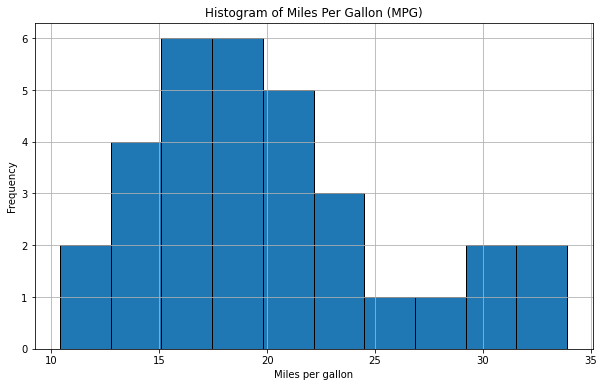

In [11]:
plt.figure(figsize=(10, 6))
plt.hist(df['mpg'], bins=10, edgecolor='black', alpha=1)
plt.title('Histogram of Miles Per Gallon (MPG)')
plt.xlabel('Miles per gallon')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### Boxplot of mpg for each cylinder type

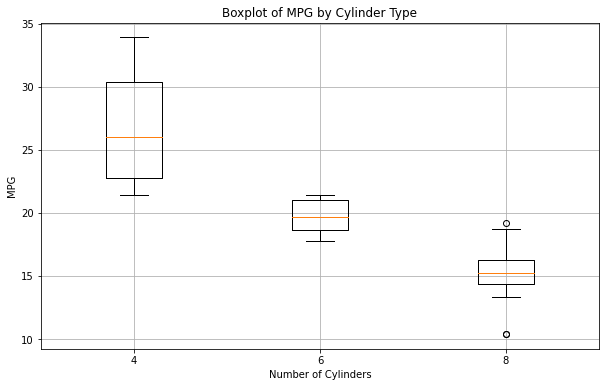

In [12]:
cylinders = df['cyl'].unique()
boxplot_data = [df[df['cyl'] == cyl]['mpg'].values for cyl in sorted(cylinders)]

plt.figure(figsize=(10, 6))
plt.boxplot(boxplot_data, labels=sorted(cylinders))
plt.title('Boxplot of MPG by Cylinder Type')
plt.xlabel('Number of Cylinders')
plt.ylabel('MPG')
plt.grid(True)
plt.show()

### Create a crosstab displaying count of automatic vs. manual cars

In [13]:
pd.crosstab(df['am'], columns='Count', rownames=['Transmission Type'])

col_0,Count
Transmission Type,
0,19
1,13


### Create a crosstab displaying count of “am vs cyl”

In [14]:
pd.crosstab(df['cyl'], columns=df['am'], rownames=['Cylinders'], colnames=['Transmission Type'])

Transmission Type,0,1
Cylinders,,
4,3,8
6,4,3
8,12,2


### What is the correlation between the weight of the car and mpg


In [15]:
df['wt'].corr(df['mpg'])

-0.8676593765172281

# EXERCISE 2: Descriptive Analytics and Visualization

In [16]:
df = pd.read_csv('week_3/bollywood.csv')

In [17]:
df.head()

,SlNo,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes
0,1,18-Apr-14,2 States,LW,Romance,36,104.00,8576361,26622,2527
1,2,4-Jan-13,Table No. 21,N,Thriller,10,12.00,1087320,1129,137
2,3,18-Jul-14,Amit Sahni Ki List,N,Comedy,10,4.00,572336,586,54
3,4,4-Jan-13,Rajdhani Express,N,Drama,7,0.35,42626,86,19
4,5,4-Jul-14,Bobby Jasoos,N,Comedy,18,10.80,3113427,4512,1224


### How many records are present in the dataset?

In [18]:
df.shape[0]

149

### How many movies got released in each genre? Sort number of releases in each genre in descending order

In [19]:
count=df['Genre'].value_counts().sort_values(ascending=False)
count

Comedy       36
 Drama       35
Thriller     26
Romance      25
Action       21
Thriller      3
Action        3
Name: Genre, dtype: int64

### Which genre had highest number of releases?

In [21]:
genre=count.idxmax()
print(genre)

Comedy


### How many movies in each genre got released in different release times like long weekend, festive season, etc. (Note: Do a cross tabulation between Genre and ReleaseTime.)

In [175]:
pd.crosstab(df['Genre'],df['ReleaseTime'])


ReleaseTime,FS,HS,LW,N
Genre,,,,
Drama,4,6,1,24
Action,3,3,3,12
Action,0,0,0,3
Comedy,3,5,5,23
Romance,3,3,4,15
Thriller,4,1,1,20
Thriller,0,0,1,2


### Which month of the year, maximum number movie releases are seen? (Note: Extract a new column called month from ReleaseDate column.)

In [176]:
df['Release Date'] = pd.to_datetime(df['Release Date'], format='%d-%b-%y')
df['Month'] = df['Release Date'].dt.month
month_no=df['Month'].value_counts().sort_values(ascending=False).idxmax()
calendar.month_name[month_no]

'January'

###  Which month of the year typically sees most releases of high budgeted movies, that is, movies with budget of 25 crore or more?

In [177]:
high_budget_df = df[df['Budget'] >= 25]
high_month=high_budget_df['Month'].value_counts().sort_values(ascending=False).idxmax()
calendar.month_name[high_month]

'February'

### Which are the top 10 movies with maximum return on investment (ROI)? Calculate return on investment (ROI) as (BoxOfficeCollection – Budget) / Budget. 

In [178]:
df['ROI'] = (df['BoxOfficeCollection'] - df['Budget']) / df['Budget']

In [179]:
top=df.sort_values(by='ROI', ascending=False).head(10)
top[['MovieName', 'ROI', 'Budget', 'BoxOfficeCollection']]

,MovieName,ROI,Budget,BoxOfficeCollection
64,Aashiqui 2,8.166667,12,110.0
89,PK,7.647059,85,735.0
132,Grand Masti,7.514286,35,298.0
135,The Lunchbox,7.500000,10,85.0
87,Fukrey,6.240000,5,36.2
58,Mary Kom,5.933333,15,104.0
128,Shahid,5.666667,6,40.0
37,Humpty Sharma Ki Dulhania,5.500000,20,130.0
101,Bhaag Milkha Bhaag,4.466667,30,164.0
115,Chennai Express,4.266667,75,395.0


### Do the movies have higher ROI if they get released on festive seasons or long weekend? Calculate the average ROI for different release times.

In [180]:
df.groupby('ReleaseTime')['ROI'].mean()

ReleaseTime
FS    0.973853
HS    0.850867
LW    1.127205
N     0.657722
Name: ROI, dtype: float64

### Is there a correlation between box office collection and YouTube likes? Is the correlation positive or negative?

In [181]:
df['BoxOfficeCollection'].corr(df['YoutubeLikes'])

0.6825165877731297

### Which genre of movies typically sees more YouTube likes? Draw boxplots for each genre of movies to compare.

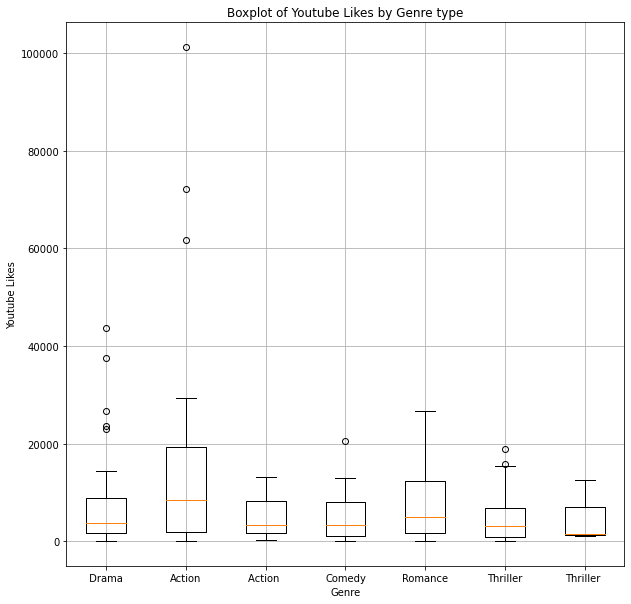

In [182]:
genre = df['Genre'].unique()
boxplot_data = [df[df['Genre'] == Genre]['YoutubeLikes'].values for Genre in sorted(genre)]

plt.figure(figsize=(10, 10))
plt.boxplot(boxplot_data, labels=sorted(genre))
plt.title('Boxplot of Youtube Likes by Genre type')
plt.xlabel('Genre')
plt.ylabel('Youtube Likes')
plt.grid(True)
plt.show()

### Which of the variables among Budget, BoxOfficeCollection, YoutubeView, YoutubeLikes, YoutubeDislikes are highly correlated? Note: Draw pair plot or heatmap

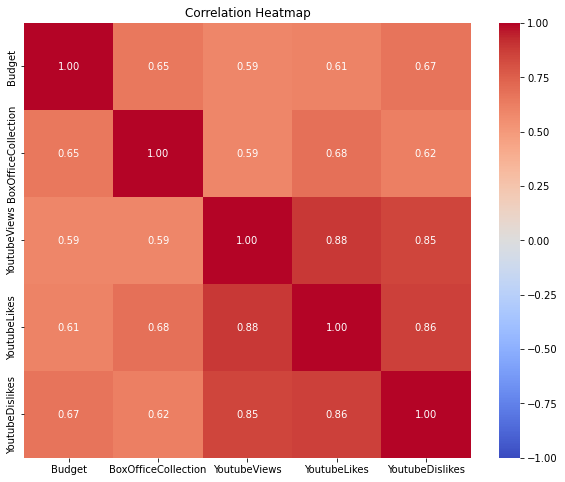

In [183]:
correlation_df= df[['Budget', 'BoxOfficeCollection', 'YoutubeViews', 'YoutubeLikes', 'YoutubeDislikes']]
correlation_matrix = correlation_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

### During 2013−2015 period, highlight the genre of movies and their box office collection? Visualize with best fit graph. 

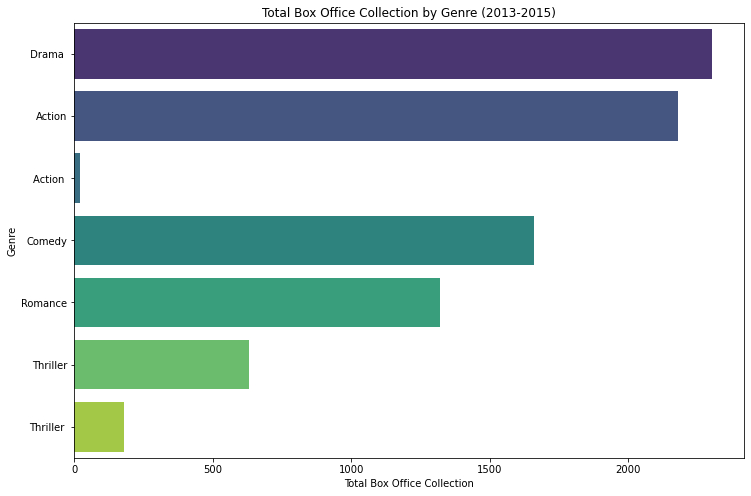

In [184]:
data_13_15 = df[(df['Release Date'].dt.year >= 2013) & (df['Release Date'].dt.year <= 2015)]
genre_box_office = data_13_15.groupby('Genre')['BoxOfficeCollection'].sum().reset_index()
plt.figure(figsize=(12, 8))
sns.barplot(x='BoxOfficeCollection', y='Genre', data=genre_box_office, palette='viridis')
plt.title('Total Box Office Collection by Genre (2013-2015)')
plt.xlabel('Total Box Office Collection')
plt.ylabel('Genre')
plt.show()

### Visualize the Budget and Box office collection based on Genre.

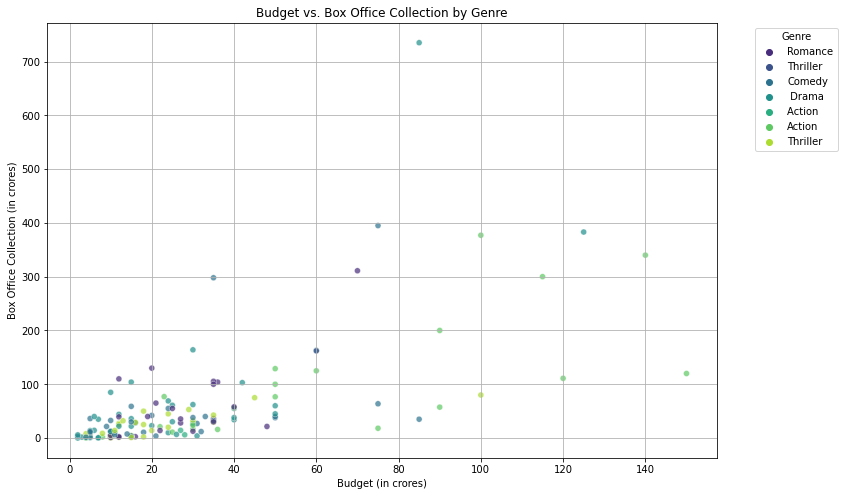

In [185]:
data = df.dropna(subset=['Budget', 'BoxOfficeCollection'])

plt.figure(figsize=(12, 8))
sns.scatterplot(x='Budget', y='BoxOfficeCollection', hue='Genre', data=data, palette='viridis', alpha=0.7)
plt.title('Budget vs. Box Office Collection by Genre')
plt.xlabel('Budget (in crores)')
plt.ylabel('Box Office Collection (in crores)')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

### Find the distribution of movie budget for every Genre

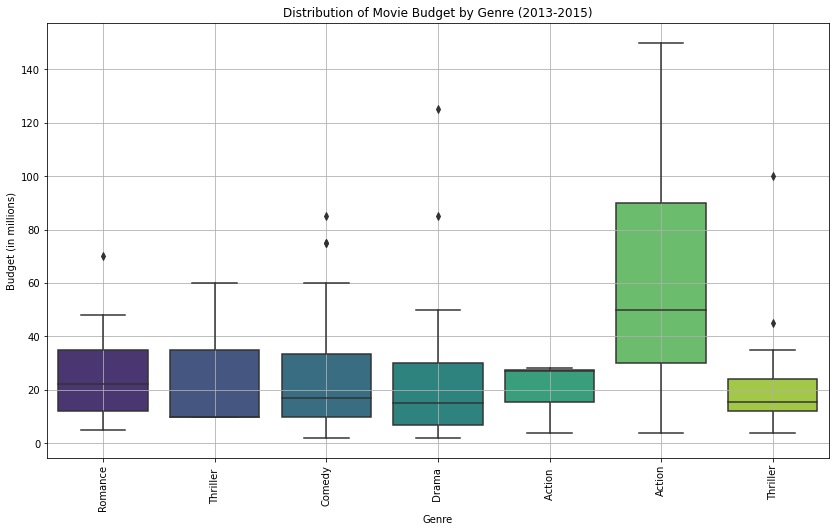

In [186]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='Genre', y='Budget', data=data, palette='viridis')
plt.title('Distribution of Movie Budget by Genre (2013-2015)')
plt.xlabel('Genre')
plt.ylabel('Budget (in millions)')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

### During 2013−2015, find the number of movies released in every year. Also, visualize with best fit graph

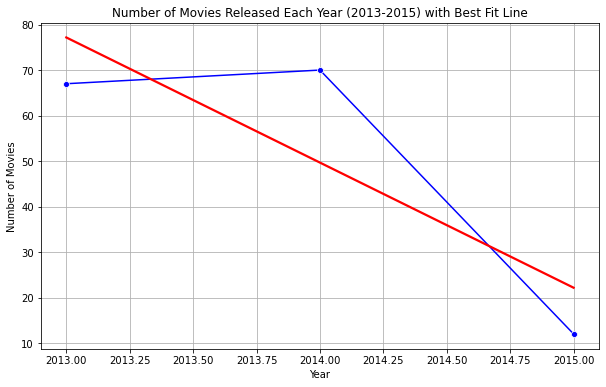

In [187]:
data_13_15['Year'] = data_13_15['Release Date'].dt.year
movies_per_year = data_13_15['Year'].value_counts().sort_index()
movies_per_year_df = movies_per_year.reset_index()
movies_per_year_df.columns = ['Year', 'Number of Movies']


plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Number of Movies', data=movies_per_year_df, marker='o', color='blue')
sns.regplot(x='Year', y='Number of Movies', data=movies_per_year_df, scatter=False, color='red', ci=None)
plt.title('Number of Movies Released Each Year (2013-2015) with Best Fit Line')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.grid(True)
plt.show()